## Data on Movies and Reviews

Monica S.

June 13, 2017

### Introduction
Movies are a fascinating medium, capable of producing an unforgettable emotional experience, one that can trigger thoughts, change minds and at its best, preserve a moment in time. 

I haven't always been fascinated with movies. I'm definitely guilty of watching romantic comedies and fun action movies, and still do! However, in the past 2 years, I've decided to depend more on critic reviews and ratings to help make my movie choices. 

My background is in accounting, and by no means do I have any educational background of the arts. With more exposure to 'high rated' movies, I've been trying to find the common denominator to a great movie. Its definitely a continuous learning experience and a working project. My curiosity and interests sparked three questions:
1. What types of movies receive the most critic reviews?
2. How frequent are movies with LGBT themes made?
3. What is the probability of a high IMDB score (6 and above) given a high number of user reviews?

### Dataset
The dataset I found for this report contains approximately 5,000 movies from 1958-2016. The data was scraped from IMDB, The Internet Movie Database, and uploaded on Kaggle. There are 28 data points including the following:

1.movie title 2.color 3.number of critic reviews 4.movie facebook likes 5.duration 6.director_name 7.director facebook likes 8.actor 3 name 9.actor 3 facebook likes 10.actor 2 name 11.actor 2 facebook likes 12.actor 1 name 13.actor 1 facebook likes 14.gross 15.genres 16.number of voted users 17.cast total facebook likes 18.facenumber in poster 19.plot keywords 20.movie imdb link 21.number of user reviews 22.language 23.country 24.content rating 25.budget 26.title year 27.imdb score 28.aspect ratio


### Question 1: What types of movies get the most critic review?

I usually do not watch horror, thriller or comedies. My default is usually romance or dramas. I am interested in seeing which types of movies critics decide to watch and review the most. 

The number of critic reviews per genre has a high variance, shown by the box and whisker plot, with a mean of 770 reviews per genre and a variance of 4,896,945.

When graphing the data in a bar graph, we discover Dramas have the highest reviews, just shy of 25,000 reviews, with Comedy and Romance as runner ups. The next group of highly reviewed genres are Action, Sci-fi, Thriller and Horror.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#import the movie dataset
url="https://raw.githubusercontent.com/bellvat/Thinkful-Challenge/master/movie_metadata.csv"
df = pd.read_csv(url, usecols = ['movie_title','num_critic_for_reviews','movie_facebook_likes','gross','genres','plot_keywords','num_user_for_reviews','language','country','budget','title_year','imdb_score'])

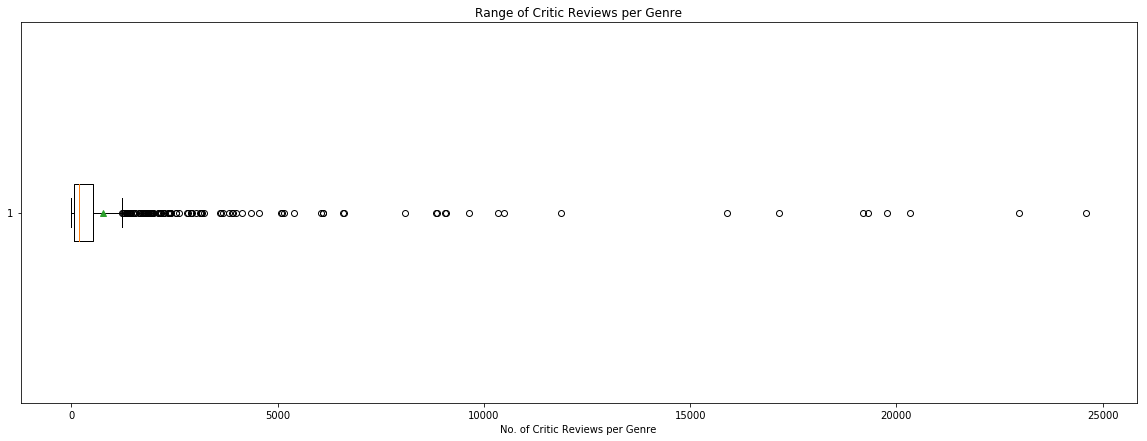

In [28]:
#group the dataset by genre and summed the remaining columns
genre=df.groupby('genres').sum()
#sort the sum of critic reviews in descending order
genre_c=genre.sort_values('num_critic_for_reviews',ascending=False)
#select genres with more than 5,000 critic reviews since I would like to display the top genres
genre_all=genre_c[(genre_c['num_critic_for_reviews']>0)]

plt.figure(figsize=(20,7))
#x=np.arange(len(genre_c20.index))
#genre=genre_c20.index
data = genre_all['num_critic_for_reviews']
#plt.xticks(x,genre,rotation=90)
plt.boxplot(data,showmeans=True,vert=False)
plt.title('Range of Critic Reviews per Genre')
plt.xlabel('No. of Critic Reviews per Genre')

plt.show()

In [36]:
mean_g=genre_all['num_critic_for_reviews'].mean()
var_g=genre_all['num_critic_for_reviews'].var()


print ('Critic Review per Genre-Mean {:4.2f}'.format(mean_g))
print ('Critic Review per Genre-Variance {:4.2f}'.format(var_g))

Critic Review per Genre-Mean 770.91
Critic Review per Genre-Variance 4896945.16


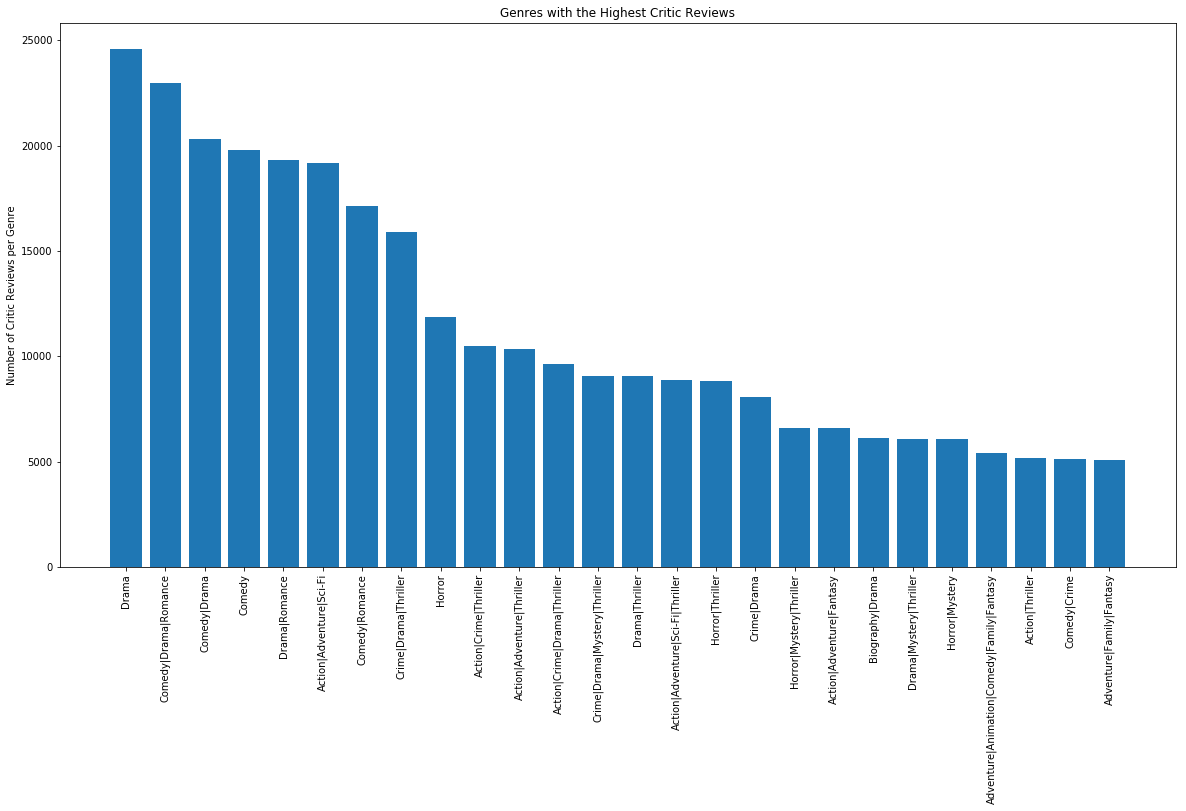

In [24]:
#group the dataset by genre and summed the remaining columns
genre=df.groupby('genres').sum()
#sort the sum of critic reviews in descending order
genre_c=genre.sort_values('num_critic_for_reviews',ascending=False)
#select genres with more than 5,000 critic reviews since I would like to display the top genres
genre_c20=genre_c[(genre_c['num_critic_for_reviews']>5000)]

#plot the genre against the number of critic review in a bar graph
plt.figure(figsize=(20,10))
x=np.arange(len(genre_c20.index))
genre=genre_c20.index
plt.xticks(x,genre,rotation=90)
plt.bar(x,genre_c20['num_critic_for_reviews'])
plt.title('Genres with the Highest Critic Reviews')
plt.ylabel('Number of Critic Reviews per Genre')

plt.show()

### Question 2: How frequent are movies with LGBT themes made?

I am interested to see the degree in which LGBT themes appear in movies. This dataset contains 'plot_keywords', making it easier to search for keywords such as 'gay','lesbian' and 'bisexual','transsexual','transvestism' and 'transgender'in movies. 

Result: If I were to randomly select a LGBT themed movie from the population, I would have about a 2.3% chance of selecting it. 

On a brighter note, I have plotted movies with LGBT themes and years released. There have been few movies with LGBT themes from 1958-1990. However, since 1990, the theme appears to be more frequent in movies.



In [10]:
total_mov= 5043
lgbt_mov=116
lgbt_p=lgbt_mov/total_mov
print('LGBT Percent {:4.2f}'.format(100*lgbt_p))


LGBT Percent 2.30


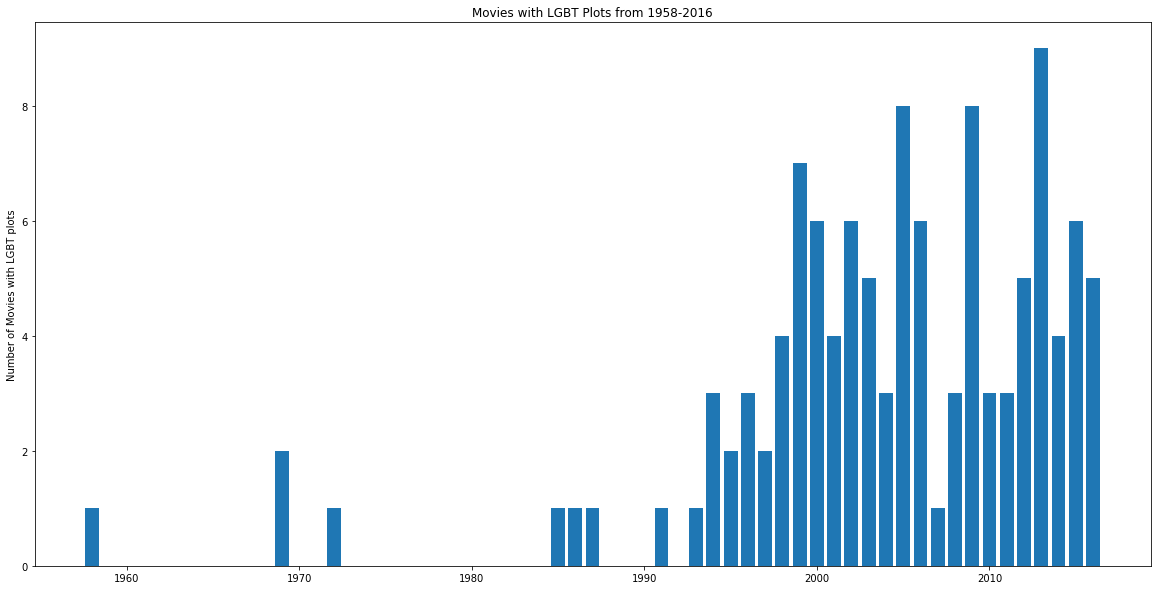

In [11]:
#slice the dataset using LGBT key words
lgbt=df[df['plot_keywords'].str.contains('gay|homosexual|lesbian|bisexual|transsexual|transvestism|transgender')==True]
#group the dataset by year and produce the count for the rest of the columns
count_lgbt= lgbt.groupby('title_year').count()

#plot the count of movies with LGBT plots against time(year) using a bar graph
plt.figure(figsize=(20,10))
plt.bar(count_lgbt.index,count_lgbt['movie_title'])
plt.ylabel('Number of Movies with LGBT plots')
plt.title('Movies with LGBT Plots from 1958-2016')

plt.show()

### Question 3: What is the probability of a high IMDB rating (6 and above) given a high number of user reviews?

I am interested in seeing whether user reviews are skewed towards good movies. Like a yelp rating, I would imagine users would review a restaurant either if they had an impressive, or horrible experience, the average experience being unworthy of the user's time. 

In order to calculate the probability of a high IMDB score given a high number of user reviews (defined as the number of user reviews above the mean of the dataset), I used Bayes' Rule:

HRA= Count of movies with 6+ IMDB score<br\>
HRE= Count of movies with no. user reviews above the mean<br\>
P(HRA)= Count of movies with 6+ IMDB score/all movies with an IMDB score<br\>
P(HRE)= Count of movies with no. user reviews above the mean/all movies with user reviews<br\>
P(HRE|HRA)=Count of movies with 6+ IMDB score with no. user reviews above the mean/all movies with user reviews<br\>

$$ P(HRA \mid HRE) = \frac{P(HRE \mid HRA) \, P(HRA)}{P(HRE)} $$

The result is that if I picked a movie with the number of user reviews above the mean of the dataset, which is about 272 reviews, there is a 59% chance that the movie will have an IMDB score of 6 or higher.

In plotting the IMDB score against the number of all user reviews, movies with low IMDB scores appear to have little user reviews. As the IMDB score increases, the count of user reviews per movie also increases.

From the results, it appears like IMDB users usually spend their time on reviewing good (high IMDB score) movies.

In [23]:
#count the movies with 6+ IMDB score
score= df.groupby(df['imdb_score']>=6).count()
#calculate the mean for user reviews
ureview_mean= df['num_user_for_reviews'].mean()
#select and count movies with number of user reviews above the mean
ureview= df.groupby(df['num_user_for_reviews']>=ureview_mean).count()
#count the number of movies that are rated with IMDB score of 6+ and have number of user reviews above the mean
df[(df['imdb_score']>=6) & (df['num_user_for_reviews']>=ureview_mean)]

#count of all movies (rows) with scores
score_pop=5043
#count of all movies (rows) with user reviews
ureview_pop=5022
#count the number of movies that are rated with IMDB score of 6+ and have number of user reviews above the mean
hrehra= 1295
p_hra = score.get_value(True,'imdb_score')/score_pop
p_hre=ureview.get_value(True,'num_user_for_reviews')/ureview_pop
p_hrehra = hrehra/ureview_pop

p_hresult=p_hrehra*p_hra/p_hre

print ("Likelihood of selecting an IMDB score of 6 and higher given a high number of user reviews:{:4.2f}".format(100*p_hresult))

Likelihood of selecting an IMDB score of 6 and higher given a high number of user reviews:59.27


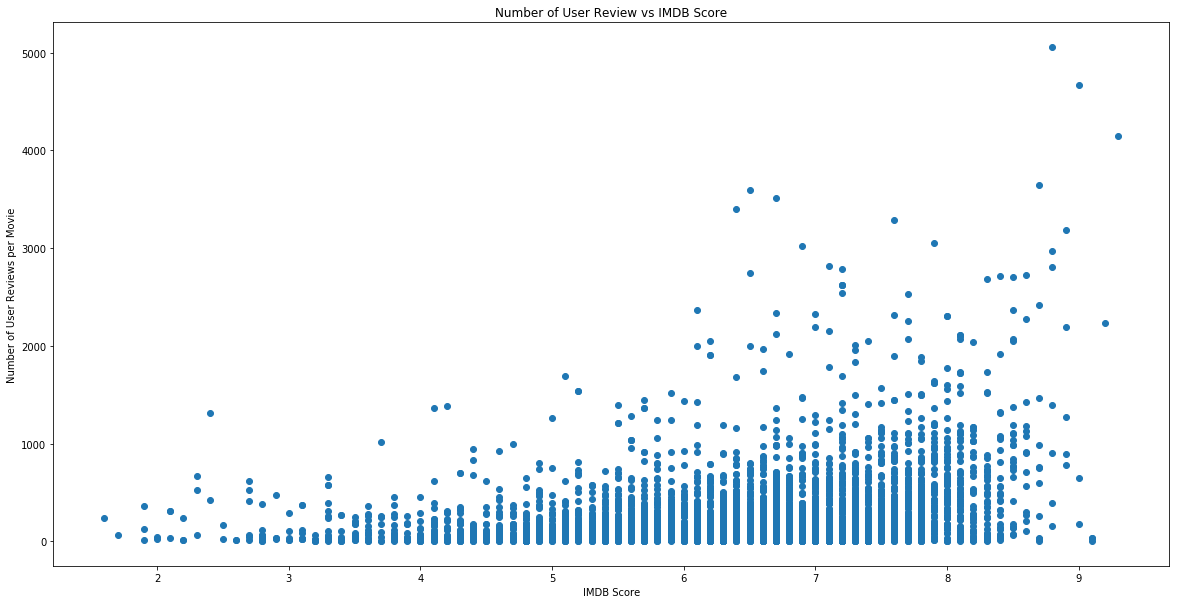

In [15]:
plt.figure(figsize=(20,10))
user_sort=df.sort_values('num_user_for_reviews')
plt.scatter(y=user_sort['num_user_for_reviews'],x=user_sort['imdb_score'])
plt.ylabel('Number of User Reviews per Movie')
plt.xlabel('IMDB Score')
plt.title('Number of User Review vs IMDB Score')
plt.show()

### Further Research
For further research, I would like to expand on the results for Question 3 above: What is the probability of a high imdb rating (6 and above) given the number of user reviews above the mean?

As opposed to asking about the probability, I would ask the following: Are high IMDB scores correlated with high user reviews? I would use linear regression or linear interpolation, which I believe I will learn during the course, to find the answer to my research question.



### Source

Source Website: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

IMDB Dataset: https://github.com/bellvat/Thinkful-Challenge/blob/master/movie_metadata.csv